In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.cm import get_cmap


In [2]:
dataset = pd.read_csv('../tables/aggregated_A_metrics.csv')

In [3]:
dataset

,model_name,10-fold_cv,AIC,DIC,WAIC,default_cv
0,m1,205.388146,-394.399183,-438.827668,-15.901158,0.033642
1,m2,208.157005,-384.561730,-431.473106,136.515574,0.044520
2,m3,349.561636,-654.489989,-702.099875,-669.252312,0.021928
3,m4,164.058566,-457.357927,-512.371022,-41.615058,0.027533
4,m5,351.272778,-703.916265,-703.162728,-707.848854,0.025284


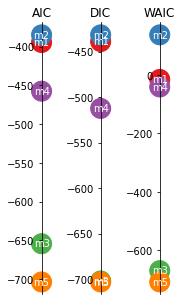

In [92]:
plottable_columns = ['AIC', 'DIC', 'WAIC']
m = len(plottable_columns)
n = dataset.shape[0]
cm = get_cmap('Set1')
c = cm.colors[:n]


fig, axs = plt.subplots(1, m, figsize=(m, 5))
labels = dataset['model_name']



def format_ax(ax, column, labels):
    data = dataset[column]
    ax.scatter(np.zeros_like(data), data, c=c, s=400)
    ax.set_xticks([])
    ax.spines['left'].set_position('zero')
    ax.spines['right'].set_color('none')
    ax.spines['bottom'].set_color('none')
    ax.spines['top'].set_color('none')
    ax.set_title(column)
    for (d, l) in zip(data, labels):
        ax.annotate(l,
                    (0, d), 
                    #xytext=(-7, -2.5), 
                    #textcoords='offset points',
                    horizontalalignment='center', verticalalignment='center',
                    color='white',
                    fontsize=10)

#format_ax(ax, data, labels)

for i, column in enumerate(plottable_columns):
    format_ax(axs[i], column, labels)

fig.show()

In [23]:
def make_metrics_figure(dataset):
    plottable_columns = ['AIC', 'DIC', 'WAIC', 'default_cv', '10-fold_cv']
    title_name_map = {'default_cv': 'MAPE', '10-fold_cv': '10-fold CV'}
    m = len(plottable_columns)
    n = dataset.shape[0]
    cm = get_cmap('Set1')
    c = cm.colors[:n]


    fig, axs = plt.subplots(1, m, figsize=(m, 6))
    labels = dataset['model_name']

    def format_ax(ax, column, labels):
        data = dataset[column]
        ax.scatter(np.zeros_like(data), data, c=c, s=400)
        ax.set_xticks([])
        ax.spines['left'].set_position('zero')
        ax.spines['right'].set_color('none')
        ax.spines['bottom'].set_color('none')
        ax.spines['top'].set_color('none')
        if column == '10-fold_cv':
            ax.invert_yaxis()
        ax.set_title(title_name_map.get(column, column))
        for (d, l) in zip(data, labels):
            ax.annotate(l,
                        (0, d), 
                        #xytext=(-7, -2.5), 
                        #textcoords='offset points',
                        horizontalalignment='center', verticalalignment='center',
                        color='white',
                        fontsize=10)

    #format_ax(ax, data, labels)

    for i, column in enumerate(plottable_columns):
        format_ax(axs[i], column, labels)

    return fig
    #plt.savefig('metrics_demo.pdf')

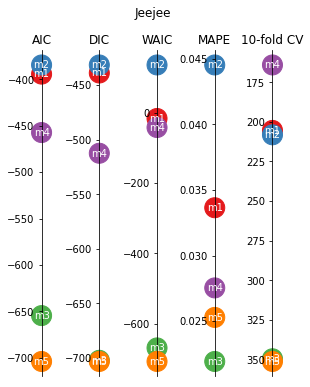

In [24]:
out = make_metrics_figure(dataset)
out.suptitle('Jeejee')
out.show()

In [33]:
def generate_dataset_plots():
    for letter in 'ABC':
        dataset_name = f'../tables/aggregated_{letter}_metrics.csv'
        dataset = pd.read_csv(dataset_name)
        fig = make_metrics_figure(dataset)
        fig.suptitle(f'Store group {letter}', fontweight='bold')
        fig.savefig(f'../plots/metrics/metrics_plot_{letter}.pdf')
        fig.show()





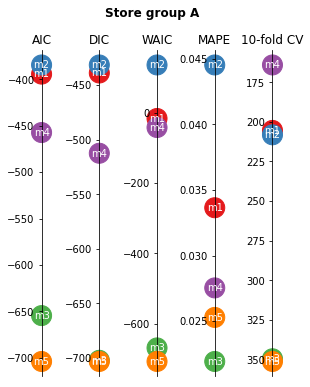

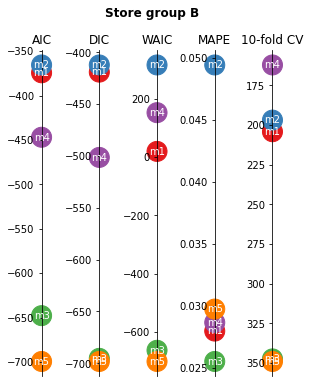

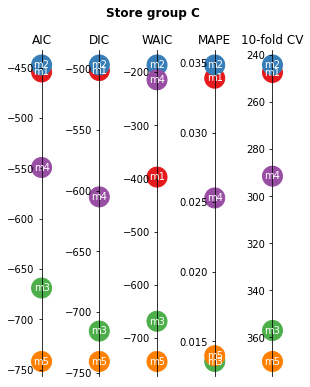

In [34]:
generate_dataset_plots()